In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/2021 팜 경진대회/3 코드/3 버스노선 관련/예측 돌린 결과/버스 승차인원 예측 (통합).csv', encoding='cp949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df[['노선번호', '표준버스정류장ID', '역명', '2022-01-31', '행정동매핑']]
df.head(5)

,노선번호,표준버스정류장ID,역명,2022-01-31,행정동매핑
0,470,100000001,종로2가사거리,7014.957308,종로1.2.3.4가동
1,741,100000001,종로2가사거리,6116.354779,종로1.2.3.4가동
2,N37,100000001,종로2가사거리,223.946415,종로1.2.3.4가동
3,100,100000002,창경궁.서울대학교병원,2788.061925,종로1.2.3.4가동
4,102,100000002,창경궁.서울대학교병원,1222.402681,종로1.2.3.4가동


In [ ]:
df.shape

(29294, 5)

In [ ]:
people_ratio = pd.read_excel('/content/drive/Shareddrives/2021 팜 경진대회/2 데이터/[ 최종 ] 데이터셋_v2.xlsx')
people_ratio = people_ratio[['자치구',	'행정동',	'인구 합계',	'기초생활수급자 인원',	'65세 이상 인구 수',	'단장기 외국인 체류자 수']]
people_ratio['취약계층 비율'] = (people_ratio['기초생활수급자 인원'] + people_ratio['65세 이상 인구 수'] + people_ratio['단장기 외국인 체류자 수'])/people_ratio['인구 합계']

people_ratio

,자치구,행정동,인구 합계,기초생활수급자 인원,65세 이상 인구 수,단장기 외국인 체류자 수,취약계층 비율
0,종로구,사직동,9645,129,1781,1088.668800,0.310904
1,종로구,삼청동,2764,41,628,237.613325,0.328008
2,종로구,부암동,9852,150,1793,536.089583,0.251633
3,종로구,평창동,18336,137,3420,539.225137,0.223398
4,종로구,무악동,8334,155,1400,95.182733,0.198006
...,...,...,...,...,...,...,...
419,강동구,암사1동,34916,651,6000,456.630092,0.203564
420,강동구,천호2동,33969,517,5921,1775.944883,0.241807
421,강동구,길동,46047,1896,7869,970.269800,0.233137
422,강동구,강일동,32700,1971,5177,483.762183,0.233387


In [ ]:
people_ratio = people_ratio.drop(['인구 합계', '기초생활수급자 인원', '65세 이상 인구 수', '단장기 외국인 체류자 수'], axis=1)

In [ ]:
# 승차인원 데이터 행정동에 맞는 취약계층 비율 채워넣기
df['취약계층 비율'] = 0.0
for idi, i in enumerate(df['행정동매핑']):
  for idj, j in enumerate(people_ratio['행정동']):
    if j==i:
      df.iloc[idi,-1] = people_ratio.iloc[idj,-1]

In [ ]:
# 예측 승차인원 x 취약계층비율 해서 예측 취약계층 승차인원
df['인원x취약계층비율'] = df['2022-01-31']*df['취약계층 비율']
df

,노선번호,표준버스정류장ID,역명,2022-01-31,행정동매핑,취약계층 비율,인원x취약계층비율
0,470,100000001,종로2가사거리,7014.957308,종로1.2.3.4가동,0.616376,4323.849243
1,741,100000001,종로2가사거리,6116.354779,종로1.2.3.4가동,0.616376,3769.972477
2,N37,100000001,종로2가사거리,223.946415,종로1.2.3.4가동,0.616376,138.035129
3,100,100000002,창경궁.서울대학교병원,2788.061925,종로1.2.3.4가동,0.616376,1718.493629
4,102,100000002,창경궁.서울대학교병원,1222.402681,종로1.2.3.4가동,0.616376,753.459312
...,...,...,...,...,...,...,...
29289,3315,123000209,마천동사거리,9662.795770,마천2동,0.310472,3000.026629
29290,3412,124000201,강일동주민센터,335.032773,강일동,0.233387,78.192369
29291,3412,124000203,강일리버파크4단지.2단지,84.462123,강일동,0.233387,19.712380
29292,3412,124000205,강일고등학교.강일리버파크7단지,51.036494,강일동,0.233387,11.911266


In [ ]:
df_imsi = df[['노선번호', '행정동매핑', '인원x취약계층비율']]
df_imsi

,노선번호,행정동매핑,인원x취약계층비율
0,470,종로1.2.3.4가동,4323.849243
1,741,종로1.2.3.4가동,3769.972477
2,N37,종로1.2.3.4가동,138.035129
3,100,종로1.2.3.4가동,1718.493629
4,102,종로1.2.3.4가동,753.459312
...,...,...,...
29289,3315,마천2동,3000.026629
29290,3412,강일동,78.192369
29291,3412,강일동,19.712380
29292,3412,강일동,11.911266


In [ ]:
# 각각의 버스(노선번호)가 지나는 버스정류장을 같은 행정동끼리 묶은것 -> 인원x취약계층비율은 같은 행정동끼리 sum한것
df_imsi1 = df_imsi.groupby(by=['노선번호', '행정동매핑']).count()
df_imsi1.columns = ['count']
df_imsi2 = df_imsi.groupby(by=['노선번호', '행정동매핑']).sum()
df_imsi2.columns = ['sum']
result = pd.concat([df_imsi1, df_imsi2], axis=1)
result.head(10)

count           sum
노선번호 행정동매핑                       
0017 면목제3.8동      2      0.000000
     용문동          2    391.963395
     원효로제1동       4      0.000000
     원효로제2동      14      0.000000
     이촌제2동        8      0.000000
     한강로동         9  19608.277903
01A  광희동          2    900.713411
     교남동          1    130.550687
     명동           1    267.187091
     사직동          1    152.786930

In [ ]:
# 최종 행정동 16개 불러오기
dong16 = pd.read_csv('/content/drive/Shareddrives/2021 팜 경진대회/3 코드/2-2 AHP/최종 선정 행정동 16개.csv', encoding='cp949')
dong16 = dong16.drop(['Unnamed: 0'], axis=1)
dong16['구'] = dong16.dong.str.split(' ').str[0]
dong16['동'] = dong16.dong.str.split(' ').str[1]
dong16 = dong16.drop('dong', axis=1)
dong16

,구,동
0,강동구,둔촌1동
1,서초구,내곡동
2,강남구,개포1동
3,강북구,우이동
4,도봉구,도봉1동
5,종로구,평창동
6,노원구,상계3.4동
7,관악구,삼성동
8,강서구,방화2동
9,용산구,이촌2동


In [ ]:
result.reset_index(inplace=True) #groupby에 의해 노선번호+행정동매핑 이 multiindex였음
result['16개 행정동 지나는지 여부'] = 0 #default 0:지나지 않음
for idi, i in enumerate(dong16['동']):
  for idj, j in enumerate(result['행정동매핑']):
    if j==i:
      result.iloc[idj,-1] = 1 #i=j이면 지남(1)으로 변경
result

,노선번호,행정동매핑,count,sum,16개 행정동 지나는지 여부
0,0017,면목제3.8동,2,0.000000,0
1,0017,용문동,2,391.963395,0
2,0017,원효로제1동,4,0.000000,0
3,0017,원효로제2동,14,0.000000,0
4,0017,이촌제2동,8,0.000000,0
...,...,...,...,...,...
7625,중랑02,면목본동,3,18544.447845,0
7626,중랑02,면목제2동,4,0.000000,0
7627,중랑02,면목제3.8동,10,0.000000,0
7628,중랑02,면목제5동,3,0.000000,0


In [ ]:
score_df = result[result['16개 행정동 지나는지 여부']==1]

In [ ]:
score_df['노선번호'].value_counts()

7212    2
1020    2
7022    2
104     2
109     2
       ..
110A    1
741     1
1128    1
강동01    1
8541    1
Name: 노선번호, Length: 98, dtype: int64

In [ ]:
score_df['행정동매핑'].value_counts()

우이동       19
내곡동       17
평창동       14
삼성동       13
인수동       11
성북동       10
청운효자동      8
상계1동       8
개포1동       8
상계3.4동     3
둔촌1동       1
Name: 행정동매핑, dtype: int64

In [ ]:
bus_line = list(set(result['노선번호']))
bus_line_selected_dong_cnt = {bus : 0 for bus in bus_line}

In [ ]:
# 노선별 "취약행정동지나는정류장" 개수 구하기

bus_line = list(set(result['노선번호']))
bus_line_selected_dong_cnt = {bus : 0 for bus in bus_line}
cnt = 0
for line in bus_line:
  cnt = 0
  now = result[result['노선번호'] == line]
  for i, row in now.iterrows():
    if row['16개 행정동 지나는지 여부'] == 1:
      cnt += row['count']
  bus_line_selected_dong_cnt[line] = cnt

# bus_line_selected_dong_cnt

In [ ]:
# 노선별 총 정류장 개수 구하기

df['16개 행정동 지나는지 여부'] = 0 #default 0:지나지 않음
for idi, i in enumerate(dong16['동']):
  for idj, j in enumerate(df['행정동매핑']):
    if j==i:
      df.iloc[idj,-1] = 1 #i=j이면 지남(1)으로 변경

bus_line = list(set(result['노선번호']))
bus_line_all_dong_cnt = {bus : 0 for bus in bus_line}
cnt = 0
for line in bus_line:
  cnt = 0
  now = df[df['노선번호'] == line]
  for i, row in now.iterrows():
    cnt += 1
  bus_line_all_dong_cnt[line] = cnt

# bus_line_all_dong_cnt

In [ ]:
# 노선별 (16개 행정동 지나는 정류장 개수)/(총 정류장 개수) 구하기

bus_line_ratio = {bus : 0 for bus in bus_line}
for line in bus_line:
  selected = bus_line_selected_dong_cnt[line]
  all = bus_line_all_dong_cnt[line]
  ratio = selected / all
  bus_line_ratio[line] = ratio
# bus_line_ratio

len 부분 끝

In [ ]:
# 노선별 16개 행정동에 대한 승차인구*취약계층비율 의 합계 구하기

bus_line = list(set(result['노선번호']))
bus_line_people_cnt = {bus : 0 for bus in bus_line}
for line in bus_line:
  cnt = 0
  now = result[result['노선번호'] == line]
  for i, row in now.iterrows():
    if row['16개 행정동 지나는지 여부'] == 1:
      cnt += row['sum']
  bus_line_people_cnt[line] = cnt
# bus_line_people_cnt

sum 부분 끝

In [ ]:
bus_line_ratio.keys() == bus_line_people_cnt.keys()
# True 반환 : 두 값의 버스 노선 정렬이 같음을 확인

True

In [ ]:
# 최종 버스 현금필요지수 계산

final_bus_score = {bus : 0 for bus in bus_line}
for key in bus_line_ratio.keys():
  line = bus_line_ratio[key]
  people = bus_line_people_cnt[key]
  score = line * people
  final_bus_score[key] = score
# final_bus_score

In [ ]:
# 노선별 현금필요지수를 df로 바꾸고 Sorting
bus_score = pd.DataFrame.from_dict(final_bus_score, orient='index')
bus_score.columns = ['score']
bus_score.sort_values(by=['score'], inplace=True, ascending=False)
bus_score

,score
관악08,22777.781405
강북02,11656.565078
성북02,7846.810417
151,7546.341765
노원02,6949.321496
...,...
종로05,0.000000
8771,0.000000
2013,0.000000
3220,0.000000


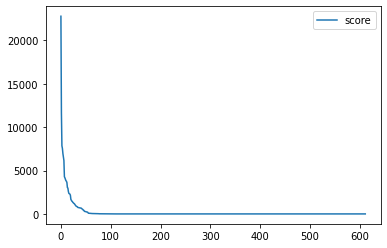

In [ ]:
bus_score_temp = bus_score.reset_index()
bus_score_temp.plot()

In [ ]:
# score가 5000 이상인 상위 7개 버스 노선 선정
selected_bus_df = bus_score.head(7)
selected_bus_list = list(selected_bus_df.index)
selected_bus_list

['관악08', '강북02', '성북02', '151', '노원02', '강북01', '성북01']

------------------------------------

--------------------------

In [ ]:
selected_bus_list

['관악08', '강북02', '성북02', '151', '노원02', '강북01', '성북01']

In [ ]:
# 선정된 버스 7개에 대해 16개 행정동을 지나는 승차인구예측치를 행정동별로 합하기
df_select_bus = pd.DataFrame()
for select_bus in selected_bus_list:
  df_select_bus = pd.concat([df_select_bus, df[df['노선번호'] == select_bus]])
sum_rider_df = pd.DataFrame(df_select_bus.groupby(['노선번호']).sum()['2022-01-31'])
sum_rider_df.columns = ['승차인원 예측치 합']
# sum_rider_df

In [ ]:
sum_rider_df = sum_rider_df.reindex(['노원02', '강북02', '151', '강북01', '성북02', '관악08', '성북01']) 

In [ ]:
# 선정된 버스 7개에 대해 총 정류장 개수 구하기
select_bus_lines_cnt = {}
for bus in bus_line_all_dong_cnt.keys():
  if bus in selected_bus_list:
    select_bus_lines_cnt[bus] = bus_line_all_dong_cnt[bus]
select_bus_lines_cnt

{'151': 84,
 '강북01': 34,
 '강북02': 27,
 '관악08': 34,
 '노원02': 40,
 '성북01': 31,
 '성북02': 35}

In [ ]:
# 선정된 버스 7개에 대해 16개 행정동 지나는 정류장의 수
select_bus_lines_select_dong_cnt = {}
for bus in bus_line_selected_dong_cnt.keys():
  if bus in selected_bus_list:
    select_bus_lines_select_dong_cnt[bus] = bus_line_selected_dong_cnt[bus]
select_bus_lines_select_dong_cnt

{'151': 24,
 '강북01': 22,
 '강북02': 20,
 '관악08': 18,
 '노원02': 18,
 '성북01': 8,
 '성북02': 23}

In [ ]:
# 선정된 버스 7개에 대해 16개 행정동 내 버정의 취약승차인구 예측치
select_bus_people_ratio_cnt = {}
for bus in bus_line_people_cnt.keys():
  if bus in selected_bus_list:
    select_bus_people_ratio_cnt[bus] = bus_line_people_cnt[bus]
select_bus_people_ratio_cnt

{'151': 26412.196175799745,
 '강북01': 10171.324548764833,
 '강북02': 15736.36285540867,
 '관악08': 43024.69821000735,
 '노원02': 15442.936658169796,
 '성북01': 23856.13218946698,
 '성북02': 11940.798461161796}

In [ ]:
bus_score = pd.DataFrame.from_dict(final_bus_score, orient='index')

In [ ]:
# 선정 버스 노선에 대한 값 보여주는 df 만들기
bus = pd.DataFrame()

select_bus_lines_cnt_df = pd.DataFrame.from_dict(select_bus_lines_cnt, orient='index')
select_bus_lines_select_dong_cnt_df = pd.DataFrame.from_dict(select_bus_lines_select_dong_cnt, orient='index')
select_bus_people_ratio_cnt_df = pd.DataFrame.from_dict(select_bus_people_ratio_cnt, orient='index')

# print(select_bus_lines_cnt_df.index)
# print(select_bus_lines_select_dong_cnt_df.index)
# print(select_bus_people_ratio_cnt_df.index)
# print(sum_rider_df.index)

bus = pd.concat([select_bus_lines_cnt_df, select_bus_lines_select_dong_cnt_df,sum_rider_df, select_bus_people_ratio_cnt_df, selected_bus_df], axis=1)
bus.columns = ['버스정류장 개수','취약행정동 내 버스정류장 개수' , '승차인원 예측치 합', 'y2' ,'SCORE']
bus.sort_values(by=['SCORE'], inplace=True, ascending=False)
bus = bus.astype('int')

len = []
for i, row in bus.iterrows():
  value = row['취약행정동 내 버스정류장 개수'] / row['버스정류장 개수']
  len.append(value)
bus['y1'] = len

In [ ]:
bus = bus[['버스정류장 개수','취약행정동 내 버스정류장 개수' ,'y1' ,'승차인원 예측치 합', 'y2' ,'SCORE']]

In [ ]:
bus.to_csv('/content/drive/Shareddrives/2021 팜 경진대회/2 데이터/0 가공완료 데이터/최종 선정 버스 7개.csv', encoding='euc-kr')

취약 행정동의 취약인구 비율 16

In [ ]:
dong_people_ratio = []
for i, row in people_ratio.iterrows():
  for j, row2 in dong16.iterrows():
    if (row['자치구'] == row2['구'] ) and (row['행정동'] == row2['동']):
      dong_people_ratio.append(row)

dong_people_ratio_df = pd.DataFrame(dong_people_ratio)
dong_people_ratio_df.reset_index(drop=True, inplace=True)
dong_people_ratio_df

,자치구,행정동,취약계층 비율
0,종로구,평창동,0.223398
1,종로구,청운효자동,0.230518
2,용산구,이촌2동,0.254483
3,성북구,성북동,0.251574
4,강북구,우이동,0.297949
5,강북구,인수동,0.313680
6,도봉구,방학3동,0.205033
7,도봉구,도봉1동,0.351761
8,노원구,상계1동,0.234162
9,노원구,상계3.4동,0.329826


In [ ]:
dong_people_ratio_df.to_csv('/content/drive/Shareddrives/2021 팜 경진대회/2 데이터/0 가공완료 데이터/선정된 취약행정동의 취약계층 비율.csv', encoding='euc-kr')